In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
# Load & Read Data
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
main_data = pd.read_csv("municipality_bus_utilization.csv", parse_dates=['timestamp'], date_parser=dateparse)
main_data

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113


In [3]:
main_data[main_data.municipality_id==1].tail()

,timestamp,municipality_id,usage,total_capacity
13026,2017-08-19 14:30:33,1,410,397
13037,2017-08-19 15:03:34,1,408,397
13048,2017-08-19 15:29:33,1,411,397
13053,2017-08-19 16:03:35,1,401,397
13061,2017-08-19 16:30:35,1,396,397


In [4]:
# Datatypes of columns
for column in main_data:
    print("column:",column,"\tdtype:",type(main_data[column].iloc[0]))

column: timestamp 	dtype: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
column: municipality_id 	dtype: <class 'numpy.int64'>
column: usage 	dtype: <class 'numpy.int64'>
column: total_capacity 	dtype: <class 'numpy.int64'>


In [5]:
# Check for NaN values
print("number of timestamps:",len(main_data["timestamp"].unique()))
print("Is there any nulls?",main_data.isnull().values.any())
if not main_data.isnull().values.any():print("No NULL Values exist")
else:print("NaNs exist :(")

number of timestamps: 1309
Is there any nulls? False
No NULL Values exist


In [6]:
# Hourly data from 8.00 to 16.30 seem to exist for each day with 30min period
main_data[main_data["municipality_id"]==0].head(20)

,timestamp,municipality_id,usage,total_capacity
3,2017-06-04 07:59:42,0,204,2813
18,2017-06-04 08:25:42,0,247,2813
29,2017-06-04 08:59:42,0,332,2813
34,2017-06-04 09:32:46,0,429,2813
47,2017-06-04 09:59:48,0,485,2813
55,2017-06-04 10:26:49,0,534,2813
65,2017-06-04 10:59:48,0,583,2813
71,2017-06-04 11:25:47,0,597,2813
88,2017-06-04 11:59:44,0,614,2813
95,2017-06-04 12:29:45,0,613,2813


In [7]:
# How many rows exist for each municipality_id
main_data.municipality_id.unique()
row_count_per_index = main_data.pivot_table(columns=['municipality_id'], aggfunc='size')
print (row_count_per_index)

municipality_id
0    1307
1    1307
2    1307
3    1307
4    1307
5    1307
6    1307
7    1307
8    1307
9    1307
dtype: int64


In [8]:
# Checking unique values of total capacity
total_capacity_list = {}
for i in range(10):
    dump = main_data[main_data["municipality_id"]==i]["total_capacity"].unique()
    print("municipality_id=",i,
          "\ttotal_capacity=",dump)
    total_capacity_list[i]=dump[0]
# Total Capacity stays constanstant, store them in a municipality_id:total_capacity dictionary
print(total_capacity_list)

municipality_id= 0 	total_capacity= [2813]
municipality_id= 1 	total_capacity= [397]
municipality_id= 2 	total_capacity= [697]
municipality_id= 3 	total_capacity= [1930]
municipality_id= 4 	total_capacity= [3893]
municipality_id= 5 	total_capacity= [587]
municipality_id= 6 	total_capacity= [3113]
municipality_id= 7 	total_capacity= [2019]
municipality_id= 8 	total_capacity= [2947]
municipality_id= 9 	total_capacity= [1332]
{0: 2813, 1: 397, 2: 697, 3: 1930, 4: 3893, 5: 587, 6: 3113, 7: 2019, 8: 2947, 9: 1332}


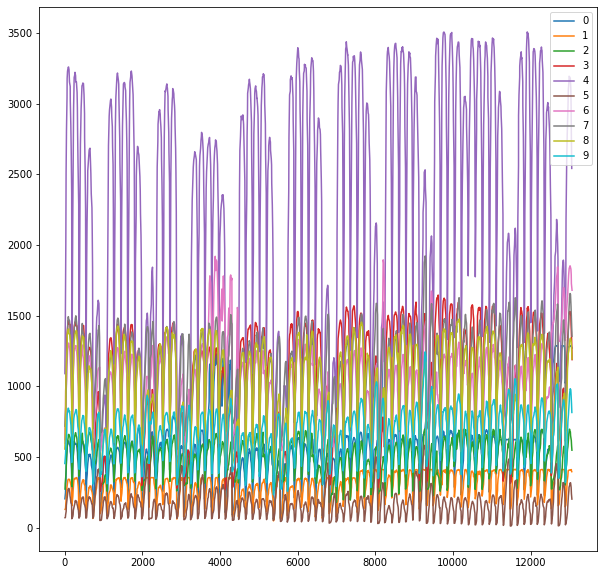

In [9]:
# Visiulize data for all municipality_ids, plot usage
plt.figure(figsize=(10,10))
for i in range(10):
    main_data[main_data["municipality_id"]==i]["usage"].plot()
plt.legend(range(10))

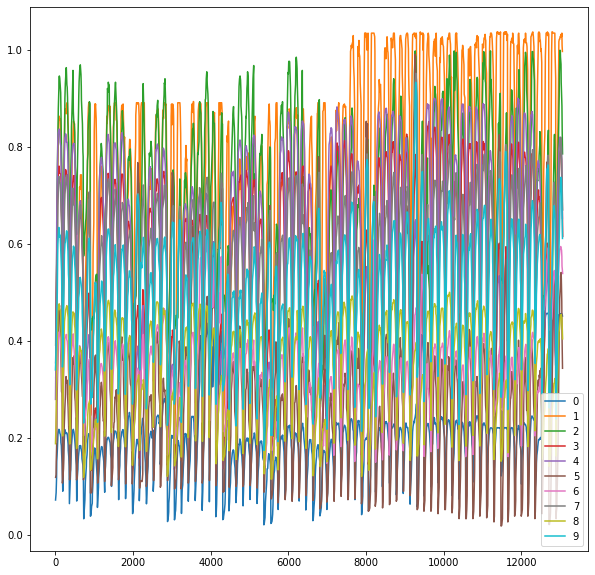

In [10]:
# Visiulize data for all municipality_ids, plot usage of capacity
plt.figure(figsize=(10,10))
for i in range(10):
    main_data[main_data["municipality_id"]==i]["usage"].div(total_capacity_list[i]).plot()
plt.legend(range(10))

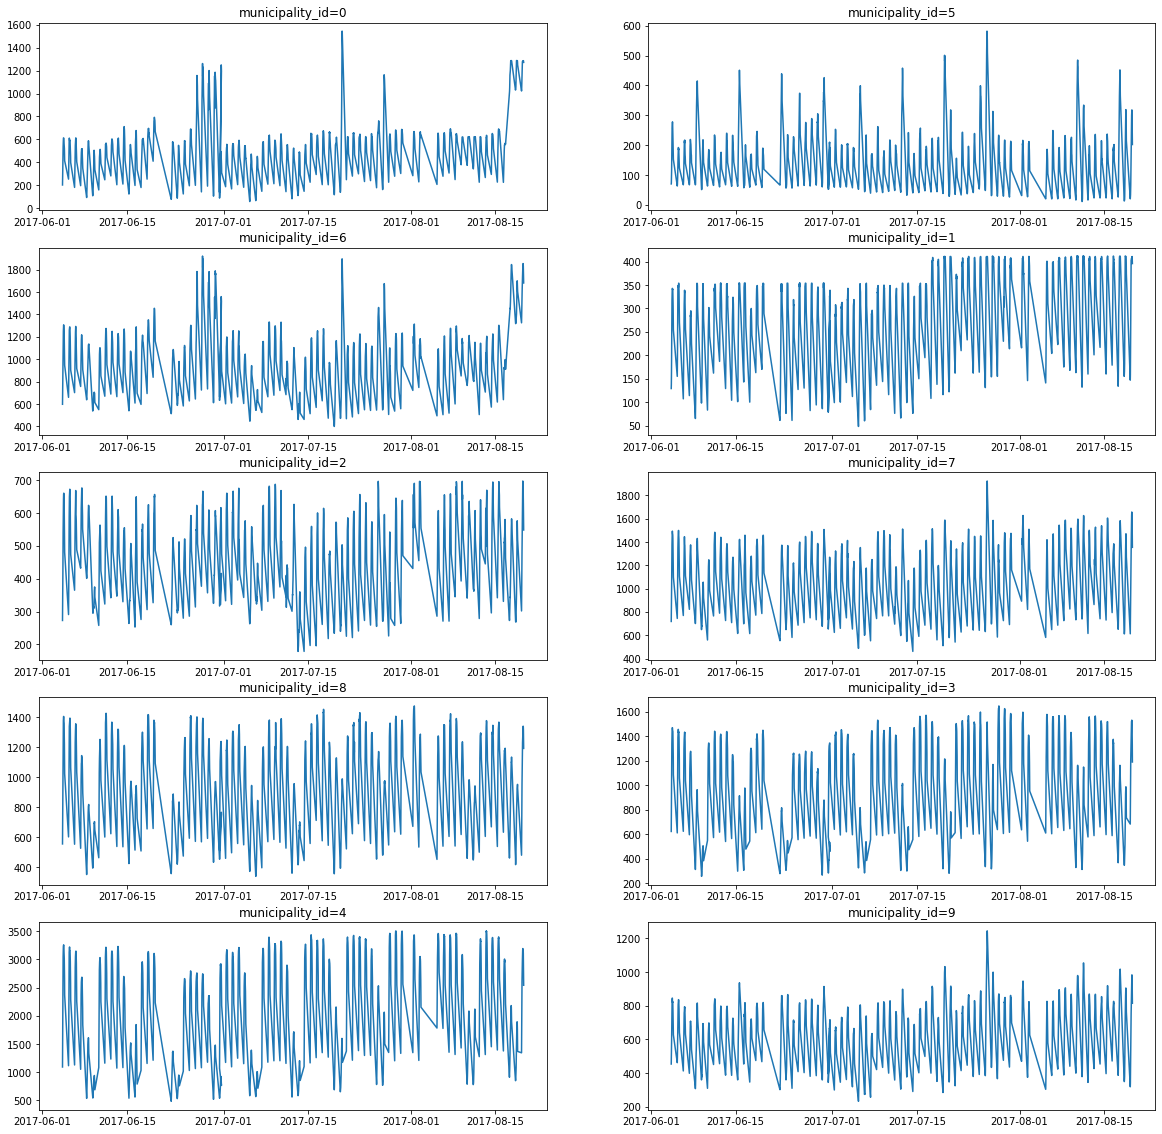

In [11]:
# Plot usage trends seperatly
fig, axs = plt.subplots(5, 2, figsize=(20,20), sharex=False)
for i in range(10):
    axs[i%5, i%2].plot(main_data[main_data["municipality_id"]==i]["timestamp"],
                       main_data[main_data["municipality_id"]==i]["usage"])
    axs[i%5, i%2].set_title(('municipality_id='+str(i)))

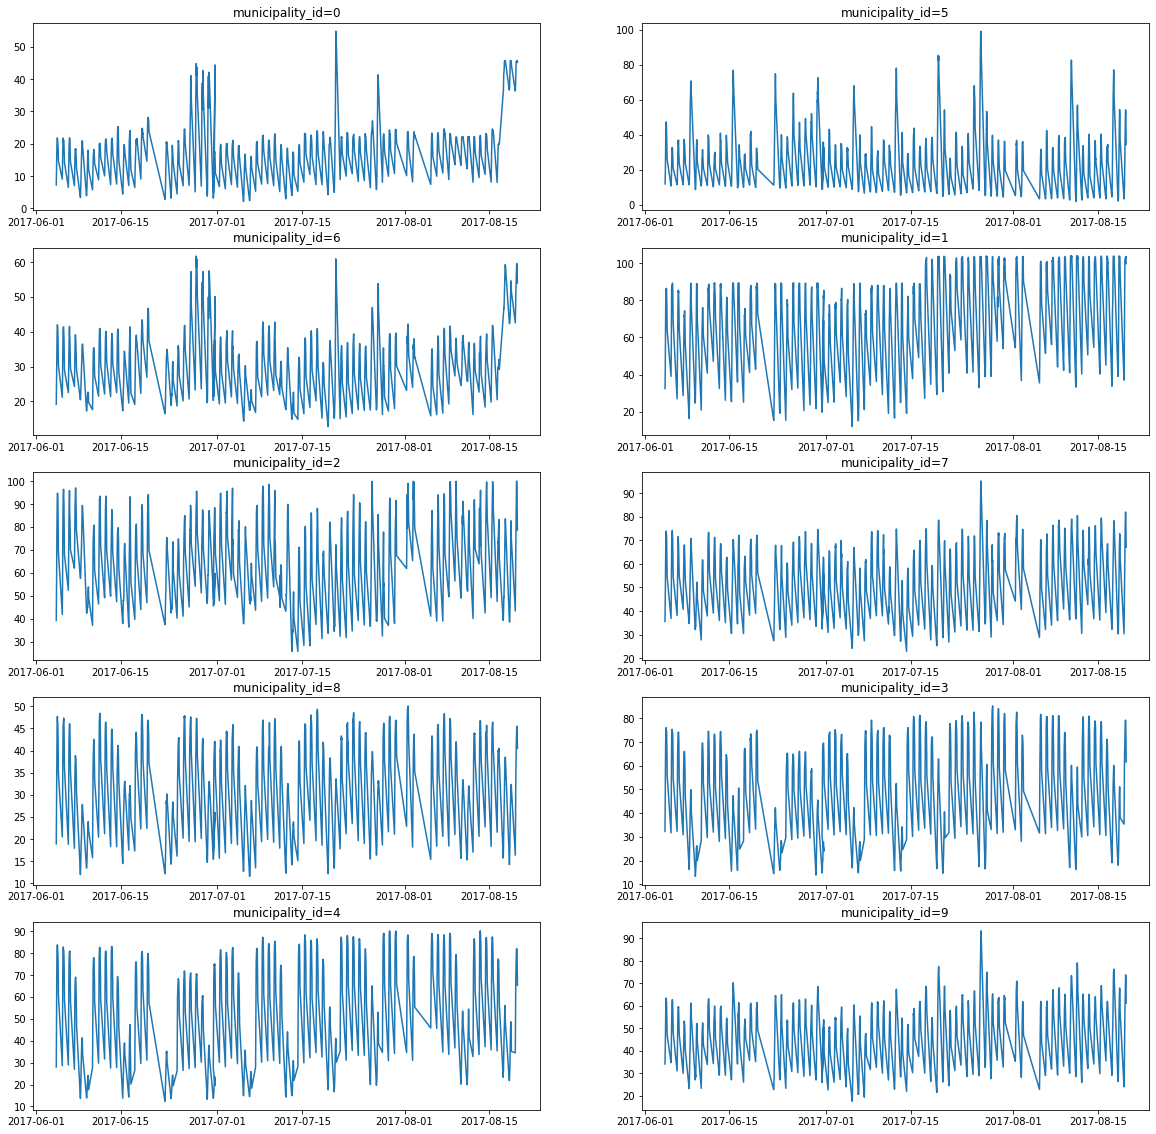

In [12]:
# Plot usage of capacity trends seperatly
fig, axs = plt.subplots(5, 2, figsize=(20,20), sharex=False)
for i in range(10):
    axs[i%5, i%2].plot(main_data[main_data["municipality_id"]==i]["timestamp"],
                       100*main_data[main_data["municipality_id"]==i]["usage"]/total_capacity_list[i])
    axs[i%5, i%2].set_title(('municipality_id='+str(i)))

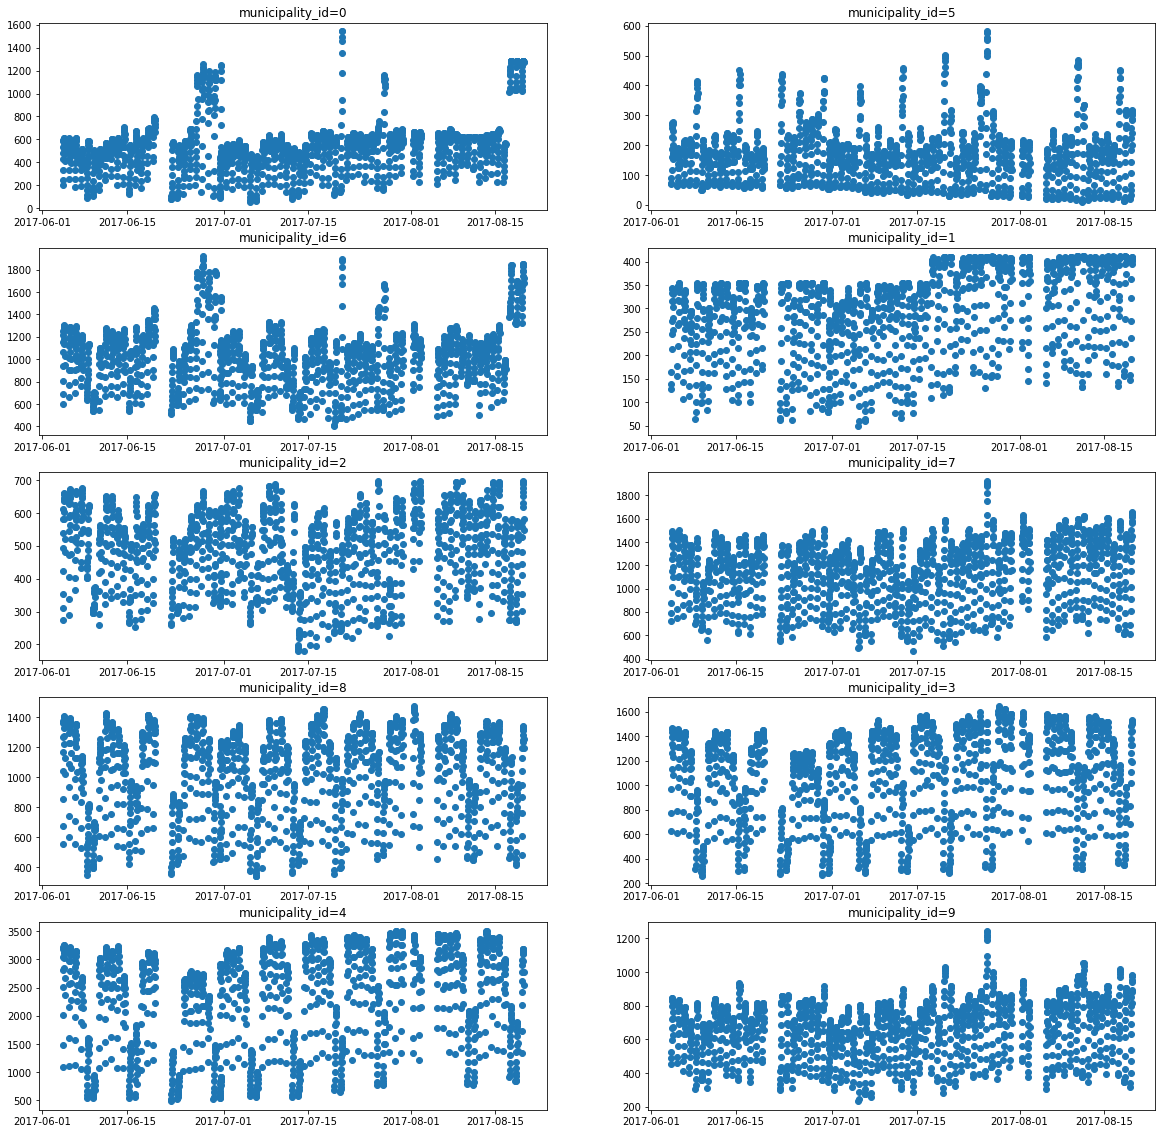

In [13]:
# Scatter usage trends seperatly to locate missing dates visually
fig, axs = plt.subplots(5, 2, figsize=(20,20), sharex=False)
for i in range(10):
    axs[i%5, i%2].scatter(main_data[main_data["municipality_id"]==i]["timestamp"],
                       main_data[main_data["municipality_id"]==i]["usage"])
    axs[i%5, i%2].set_title(('municipality_id='+str(i)))

In [14]:
# Round each hour to 30min to clean counting delays(1-2 mins), and then keep hourly max.
half_df = main_data.copy()
half_df.timestamp = half_df.timestamp.round('30min')
hour_df = half_df.copy()
hour_df.timestamp = hour_df.timestamp.dt.floor('1H')
hour_df = hour_df.groupby(["timestamp","municipality_id"]).max()
hour_df = hour_df.reset_index()
hour_df

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 08:00:00,0,247,2813
1,2017-06-04 08:00:00,1,138,397
2,2017-06-04 08:00:00,2,311,697
3,2017-06-04 08:00:00,3,770,1930
4,2017-06-04 08:00:00,4,1476,3893
...,...,...,...,...
6475,2017-08-19 16:00:00,5,239,587
6476,2017-08-19 16:00:00,6,1727,3113
6477,2017-08-19 16:00:00,7,1450,2019
6478,2017-08-19 16:00:00,8,1253,2947


In [15]:
# Check unique hours
hour_df.timestamp.apply(lambda x: (x.hour, x.minute)).unique()

array([(8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0),
       (15, 0), (16, 0)], dtype=object)

In [16]:
# Summary with pivot, easier to use
pivot_df = hour_df.pivot(index="timestamp", columns="municipality_id", values="usage")
pivot_df

municipality_id,0,1,2,3,4,5,6,7,8,9
timestamp,,,,,,,,,,
2017-06-04 08:00:00,247,138,311,770,1476,73,687,789,674,487
2017-06-04 09:00:00,429,213,423,1130,2511,116,941,1013,1045,599
2017-06-04 10:00:00,534,273,539,1333,3044,186,1151,1254,1266,724
2017-06-04 11:00:00,597,333,613,1437,3230,256,1250,1433,1378,829
2017-06-04 12:00:00,614,343,657,1469,3260,275,1306,1493,1406,845
...,...,...,...,...,...,...,...,...,...,...
2017-08-19 12:00:00,1281,406,663,1484,3157,258,1787,1503,1251,849
2017-08-19 13:00:00,1283,408,697,1519,3194,300,1845,1627,1315,941
2017-08-19 14:00:00,1285,410,687,1530,3183,318,1853,1657,1341,983


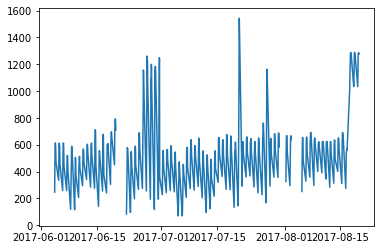

In [17]:
# Resample by 1H (add missing hours with NaN Values) & filter the needed time interval
pivot_df = pivot_df.resample('1H').asfreq().between_time('07:59', '16:01')
plt.plot(pivot_df.iloc[:,0])

In [18]:
# Apply first order(linear) spline interpolation to EVERY HOUR SEPERATELY to keep the seasonal trends
for i in range(7,16):
    pivot_interval = pivot_df.between_time('{0}:30'.format(i), '{0}:30'.format(i+1))
    pivot_interval = pivot_interval.interpolate('spline', order=1)
    pivot_df.loc[pivot_df.between_time('{0}:30'.format(i), '{0}:30'.format(i+1)).index] = pivot_interval

C:\Users\user\Miniconda3\envs\bitirme\lib\site-packages\scipy\interpolate\fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [19]:
# Just to cheeck how to geet each hour data seperately
i=15
pivot_df.between_time('{0}:30'.format(i), '{0}:30'.format(i+1))

municipality_id,0,1,2,3,4,5,6,7,8,9
timestamp,,,,,,,,,,
2017-06-04 16:00:00,470.0,279.0,520.0,1227.0,2665.0,171.0,1028.0,1184.0,1130.0,673.0
2017-06-05 16:00:00,454.0,293.0,522.0,1212.0,2580.0,130.0,1001.0,1207.0,1161.0,694.0
2017-06-06 16:00:00,443.0,269.0,510.0,1179.0,2551.0,144.0,982.0,1166.0,1132.0,665.0
2017-06-07 16:00:00,404.0,249.0,551.0,1060.0,2132.0,167.0,945.0,1115.0,968.0,573.0
2017-06-08 16:00:00,582.0,347.0,621.0,874.0,1473.0,390.0,1135.0,1402.0,819.0,790.0
...,...,...,...,...,...,...,...,...,...,...
2017-08-15 16:00:00,675.0,387.0,654.0,1283.0,2893.0,149.0,1262.0,1467.0,1253.0,822.0
2017-08-16 16:00:00,562.0,398.0,506.0,1100.0,2411.0,177.0,935.0,1264.0,1128.0,767.0
2017-08-17 16:00:00,1286.0,411.0,582.0,1121.0,2010.0,388.0,1844.0,1582.0,1135.0,1017.0


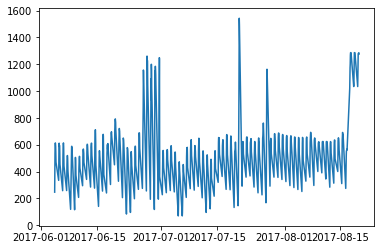

In [20]:
# Check interpolation Results
plt.plot(pivot_df.iloc[:,0])

In [21]:
# We have a clean data of 9 hours*77 days*10 municipalities
pivot_df

municipality_id,0,1,2,3,4,5,6,7,8,9
timestamp,,,,,,,,,,
2017-06-04 08:00:00,247.0,138.0,311.0,770.0,1476.0,73.0,687.0,789.0,674.0,487.0
2017-06-04 09:00:00,429.0,213.0,423.0,1130.0,2511.0,116.0,941.0,1013.0,1045.0,599.0
2017-06-04 10:00:00,534.0,273.0,539.0,1333.0,3044.0,186.0,1151.0,1254.0,1266.0,724.0
2017-06-04 11:00:00,597.0,333.0,613.0,1437.0,3230.0,256.0,1250.0,1433.0,1378.0,829.0
2017-06-04 12:00:00,614.0,343.0,657.0,1469.0,3260.0,275.0,1306.0,1493.0,1406.0,845.0
...,...,...,...,...,...,...,...,...,...,...
2017-08-19 12:00:00,1281.0,406.0,663.0,1484.0,3157.0,258.0,1787.0,1503.0,1251.0,849.0
2017-08-19 13:00:00,1283.0,408.0,697.0,1519.0,3194.0,300.0,1845.0,1627.0,1315.0,941.0
2017-08-19 14:00:00,1285.0,410.0,687.0,1530.0,3183.0,318.0,1853.0,1657.0,1341.0,983.0


In [22]:
# Normalize Data between 0-1 by total capacity. 
# There are days that usage exceeds total capacity. Therefore, total capacity is increased by %10 to keep values under 1.
pivot_df = pivot_df.div(total_capacity_list).div(1.1)
pivot_df

municipality_id,0,1,2,3,4,5,6,7,8,9
timestamp,,,,,,,,,,
2017-06-04 08:00:00,0.079824,0.316006,0.405635,0.362694,0.344675,0.113056,0.200625,0.355261,0.207916,0.332378
2017-06-04 09:00:00,0.138642,0.487749,0.551715,0.532266,0.586367,0.179650,0.274801,0.456121,0.322362,0.408818
2017-06-04 10:00:00,0.172575,0.625143,0.703013,0.627885,0.710833,0.288059,0.336127,0.564636,0.390536,0.494130
2017-06-04 11:00:00,0.192935,0.762537,0.799530,0.676872,0.754268,0.396469,0.365038,0.645234,0.425086,0.565793
2017-06-04 12:00:00,0.198429,0.785436,0.856919,0.691945,0.761273,0.425894,0.381392,0.672250,0.433723,0.576713
...,...,...,...,...,...,...,...,...,...,...
2017-08-19 12:00:00,0.413987,0.929700,0.864745,0.699011,0.737221,0.399566,0.521858,0.676753,0.385909,0.579443
2017-08-19 13:00:00,0.414633,0.934280,0.909091,0.715497,0.745861,0.464612,0.538796,0.732586,0.405651,0.642233
2017-08-19 14:00:00,0.415280,0.938860,0.896048,0.720678,0.743292,0.492489,0.541132,0.746094,0.413672,0.670898


In [23]:
# Seperate Data as Train and Test(Last 2 Weeks)
train_df = pivot_df.iloc[:-9*14]
test_df = pivot_df.iloc[-9*14:]
train_df

municipality_id,0,1,2,3,4,5,6,7,8,9
timestamp,,,,,,,,,,
2017-06-04 08:00:00,0.079824,0.316006,0.405635,0.362694,0.344675,0.113056,0.200625,0.355261,0.207916,0.332378
2017-06-04 09:00:00,0.138642,0.487749,0.551715,0.532266,0.586367,0.179650,0.274801,0.456121,0.322362,0.408818
2017-06-04 10:00:00,0.172575,0.625143,0.703013,0.627885,0.710833,0.288059,0.336127,0.564636,0.390536,0.494130
2017-06-04 11:00:00,0.192935,0.762537,0.799530,0.676872,0.754268,0.396469,0.365038,0.645234,0.425086,0.565793
2017-06-04 12:00:00,0.198429,0.785436,0.856919,0.691945,0.761273,0.425894,0.381392,0.672250,0.433723,0.576713
...,...,...,...,...,...,...,...,...,...,...
2017-08-05 12:00:00,0.211680,0.911381,0.761706,0.739049,0.808211,0.263280,0.315977,0.618668,0.389919,0.545318
2017-08-05 13:00:00,0.209740,0.918251,0.791705,0.742817,0.807977,0.288059,0.318897,0.638930,0.393621,0.563746
2017-08-05 14:00:00,0.201015,0.897641,0.755185,0.723033,0.796068,0.277219,0.306632,0.618218,0.390227,0.548048


In [24]:
test_df

municipality_id,0,1,2,3,4,5,6,7,8,9
timestamp,,,,,,,,,,
2017-08-06 08:00:00,0.106325,0.494619,0.405635,0.369289,0.499731,0.030974,0.172882,0.321041,0.213777,0.280508
2017-08-06 09:00:00,0.148337,0.602244,0.507369,0.541215,0.658058,0.074338,0.230996,0.398937,0.301694,0.345345
2017-08-06 10:00:00,0.183887,0.762537,0.654754,0.629769,0.736520,0.199783,0.289402,0.513756,0.372336,0.442260
2017-08-06 11:00:00,0.209417,0.911381,0.734316,0.720207,0.795834,0.354654,0.317729,0.595254,0.410896,0.524161
2017-08-06 12:00:00,0.211033,0.909091,0.783879,0.731983,0.803774,0.385628,0.335251,0.619118,0.416757,0.539858
...,...,...,...,...,...,...,...,...,...,...
2017-08-19 12:00:00,0.413987,0.929700,0.864745,0.699011,0.737221,0.399566,0.521858,0.676753,0.385909,0.579443
2017-08-19 13:00:00,0.414633,0.934280,0.909091,0.715497,0.745861,0.464612,0.538796,0.732586,0.405651,0.642233
2017-08-19 14:00:00,0.415280,0.938860,0.896048,0.720678,0.743292,0.492489,0.541132,0.746094,0.413672,0.670898


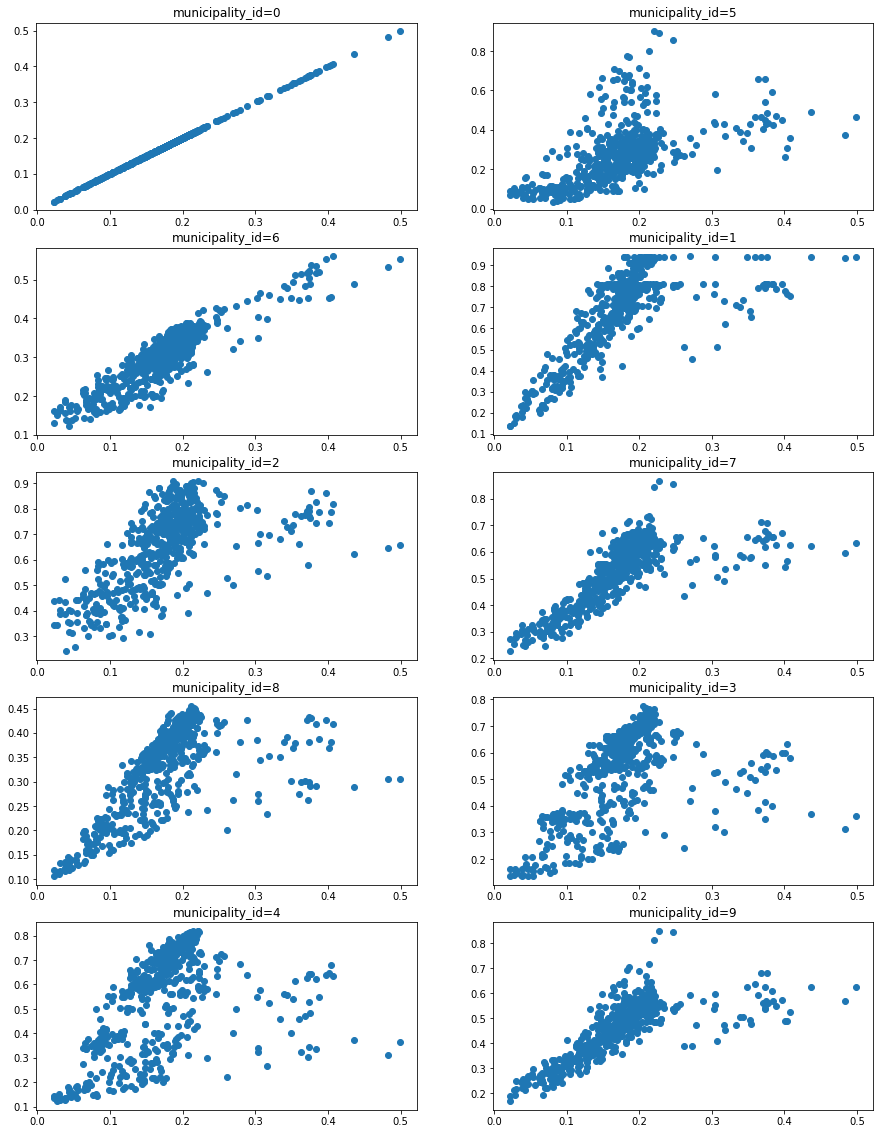

In [25]:
# Correlation between municipality 0 and any municipality
fig, axs = plt.subplots(5, 2, figsize=(15,20), sharex=False)
for i in range(10):
    axs[i%5, i%2].scatter(train_df.iloc[:,0] ,train_df.iloc[:,i])
    axs[i%5, i%2].set_title(('municipality_id='+str(i)))

In [28]:
# fit an ARIMA model and plot residual errors
# Retrieved from: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
import statsmodels.api as sm
from matplotlib import pyplot
# load dataset
series = train_df.iloc[:,0]
# fit model
model = sm.tsa.ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = train_df.iloc[:,0] 
# split into train and test sets
X = series.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = sm.tsa.ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# Single neuron LSTM

In [ ]:
### LSTM PART ###
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, AveragePooling1D
import tensorflow as tf

In [ ]:
size = int(len(train_df) * 8/9)
data_train, data_test = train_df.iloc[0:size,0], train_df.iloc[size:len(X),0]
num_of_train_days = len(data_train)
num_of_test_days = len(data_test)
print("Training for:", num_of_train_days)
print("Testing for:", num_of_test_days)

In [ ]:
dataset_train = np.asarray((data_train.values)).reshape(-1, 1)
dataset_test = np.asarray((data_test.values)).reshape(-1, 1)
len_data = dataset_train.shape[0]
timesteps = 18
epochs = 100
batch_size = 64
loss_function = 'mean_squared_error'

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(dataset_train)
training_set_scaled[np.isnan(training_set_scaled)] = -1
# training_set_scaled = dataset_train

X_train = []
y_train = []
for i in range(timesteps, len_data):
    X_train.append(training_set_scaled[i - timesteps : i])
    y_train.append(training_set_scaled[i][0])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train = y_train.reshape(-1, 1)

regressor = Sequential()
regressor.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss=loss_function)
history = regressor.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

In [ ]:
# FIX BELOW
dataset_total = np.concatenate((dataset_train, dataset_test), axis=0)
predictions = np.zeros((18, 1))
for block in range(0, len(dataset_total) - 18, timesteps):
    # print(block)
    dataset_total = np.concatenate((dataset_train, dataset_test), axis=0)
    inputs = dataset_total[block: block + 18]
    inputs = sc.fit_transform(inputs)
    X_test = []
    l = len(dataset_total[dataset_total.shape[0] - dataset_test.shape[0] - timesteps:])
    for i in range(timesteps - 1, l):
    X_test.append(inputs[i - timesteps + 1: i + 1])
    X_test = np.array(X_test)
    X_test.shape
    prediction = regressor.predict(X_test)[1:]
    prediction_cloned = np.tile(prediction, (1, dataset_train.shape[1]))
    prediction = sc.inverse_transform(prediction_cloned)[:,0].reshape(-1, 1)
    predictions = np.concatenate((predictions, prediction), axis=0)
    print('block:', block, 'predictions size:', predictions.shape)

In [ ]:
# LSTM with convolutions